In [4]:
import os
import scanpy as sc
import pandas as pd
import numpy as np
import anndata as ad
import cellhint
import warnings
warnings.filterwarnings('ignore', category=UserWarning)
import matplotlib.pyplot as plt

os.chdir('/home/aih/shrey.parikh/PDAC/PDAC/')

In [14]:
peng_PDAC = sc.read_h5ad('processed_datasets/All_genes/Peng_PDAC.h5ad')
regev_PDAC = sc.read_h5ad('processed_datasets/All_genes/Regev_PDAC.h5ad')
zenodo_PDAC = sc.read_h5ad('processed_datasets/All_genes/zenodo_PDAC_new.h5ad')

In [ ]:
peng_PDAC.obs = peng_PDAC.obs[['CONDITION', 'Patient', 'Type', 'Cell_type', 'Dataset', 'ID']]

regev_PDAC.obs = regev_PDAC.obs[['sampleid','ID', 'Dataset', 'Level 1 Annotation', 'Level 2 Annotation', 'Level 3 Annotation', 'MALIGNANT CELLS', 'treatment_status']]

zenodo_PDAC.obs = zenodo_PDAC.obs[['Type', 'Cell_type', 'Patient', 'ID', 'Dataset']]

zenodo_PDAC.obs

In [ ]:
adata = ad.concat([regev_PDAC, peng_PDAC, zenodo_PDAC], join='outer', fill_value=0)

adata.obs.rename(columns={'Level 1 Annotation': 'L1_Annot_regev', 'Level 2 Annotation': 'L2_Annot_regev', 'Level 3 Annotation': 'L3_Annot_regev'}, inplace=True)

adata.obs

adata.obs = adata.obs.astype(str)

adata.obs['L1_Annot_regev'] = adata.obs['L1_Annot_regev'].replace('nan', pd.NA)
adata.obs['L1_Annot_regev'].fillna(adata.obs['Cell_type'])
adata.obs['Annot_all'] = adata.obs['L1_Annot_regev'].fillna(adata.obs['Cell_type'])

sc.pp.neighbors(adata)
sc.tl.umap(adata)

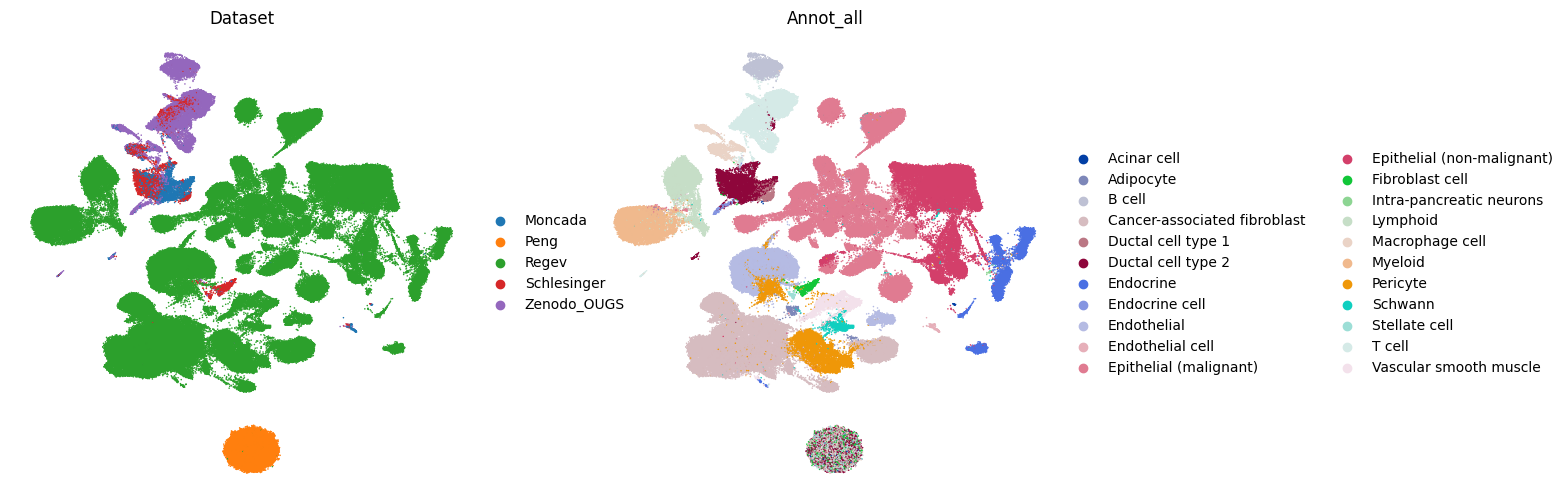

In [23]:
plt.rcParams['figure.figsize'] = (6,6)
random_indices=np.random.permutation(list(range(adata.shape[0])))
sc.pl.umap(adata[random_indices,:], color=['Dataset', 'Annot_all'], size=5, frameon=False)

In [ ]:
alignment = cellhint.harmonize(adata, dataset='Dataset', cell_type='Annot_all', use_pct = True)

⚠️ Warning: 35970 features are used and may take long time for building PCT. Subsetting the AnnData into HVGs is recommended
👀 Detected PCA coordinates in the object, will use these to calculate distances
🏋️ Training the predictive clustering trees for:
      Moncada
      Peng
      Regev


In [ ]:
alignment

# Needs to be done with HVGs

In [2]:
pwd

'/home/aih/shrey.parikh/PDAC/PDAC'

In [4]:
adata = sc.read_h5ad('concatenated_datasets/PDAC_concat_hvg_batch_key_datasets_hvg.h5ad')

In [5]:
adata.obs = adata.obs[['Type', 'Cell_type', 
           'sampleid','ID', 'Dataset', 'Level 1 Annotation', 'Level 2 Annotation', 'Level 3 Annotation', 'Patient']]

In [5]:
adata.obs.Dataset.unique()

['Ding', 'Lee', 'Regev', 'Simeone', 'Steele', ..., 'Caronni', 'Zhang', 'Moncada', 'Schlesinger', 'Zenodo_OUGS']
Length: 11
Categories (11, object): ['Caronni', 'Ding', 'Lee', 'Moncada', ..., 'Simeone', 'Steele', 'Zenodo_OUGS', 'Zhang']

In [6]:
adata = adata[adata.obs.Dataset.isin(['Regev','Moncada', 'Peng', 'Schlesinger', 'Zenodo_OUGS'])]

In [7]:
adata.obs.rename(columns={'Level 1 Annotation': 'L1_Annot_regev', 'Level 2 Annotation': 'L2_Annot_regev', 'Level 3 Annotation': 'L3_Annot_regev'}, inplace=True)

adata.obs

adata.obs = adata.obs.astype(str)

adata.obs['L1_Annot_regev'] = adata.obs['L1_Annot_regev'].replace('nan', pd.NA)
adata.obs['Annot_all'] = adata.obs['L1_Annot_regev'].fillna(adata.obs['Cell_type'])

In [11]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)

... storing 'Type' as categorical
... storing 'Cell_type' as categorical
... storing 'sampleid' as categorical
... storing 'ID' as categorical
... storing 'Dataset' as categorical
... storing 'L1_Annot_regev' as categorical
... storing 'L2_Annot_regev' as categorical
... storing 'L3_Annot_regev' as categorical
... storing 'Patient' as categorical
... storing 'Annot_all' as categorical


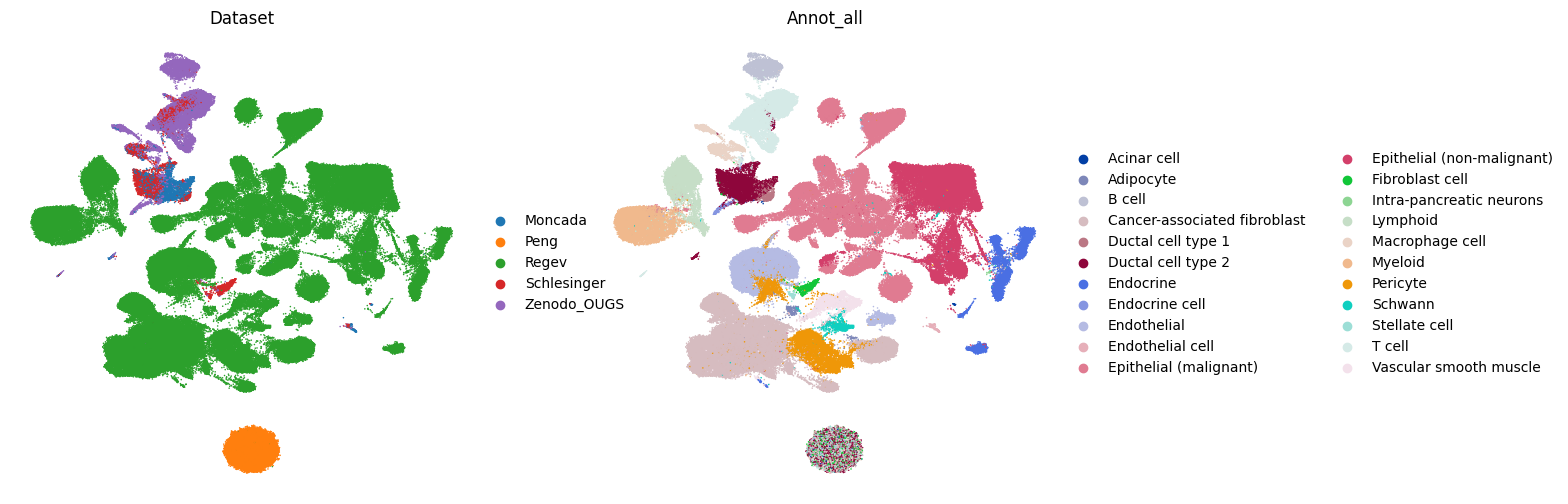

In [12]:
plt.rcParams['figure.figsize'] = (6,6)
random_indices=np.random.permutation(list(range(adata.shape[0])))
sc.pl.umap(adata[random_indices,:], color=['Dataset', 'Annot_all'], size=5, frameon=False)

In [14]:
alignment = cellhint.harmonize(adata, dataset='Dataset', cell_type='Annot_all', use_pct = True)

👀 Detected PCA coordinates in the object, will use these to calculate distances
🏋️ Training the predictive clustering trees for:
      Moncada
      Peng
      Regev
      Schlesinger
      Zenodo_OUGS
🖋️ Predicting distances using the PCT in each dataset
🏆 Reordering datasets
🖇 Harmonizing cell types of Moncada and Zenodo_OUGS
🖇 Harmonizing cell types of Schlesinger
🖇 Harmonizing cell types of Regev
🖇 Harmonizing cell types of Peng
🖋️ Reannotating cells
✅ Harmonization done!


In [15]:
alignment.write('cellhint/regev_peng_zenodo.pkl')

In [16]:
alignment.relation

,Moncada,relation,Zenodo_OUGS,relation,Schlesinger,relation,Regev,relation,Peng
0,Acinar cell,=,UNRESOLVED,∈,Acinar cell,=,NONE,=,NONE
1,Ductal cell type 1,=,NONE,∈,Acinar cell,=,NONE,=,NONE
2,Endocrine cell,=,Endocrine cell,=,NONE,=,NONE,=,NONE
3,Fibroblast cell,=,Stellate cell,∋,Fibroblast cell,=,NONE,=,NONE
4,Fibroblast cell,=,Stellate cell,∋,Stellate cell,=,NONE,=,NONE
5,NONE,=,Acinar cell,=,NONE,=,NONE,=,NONE
6,NONE,=,Endothelial cell,=,NONE,=,NONE,=,NONE
7,NONE,=,NONE,=,NONE,=,Intra-pancreatic neurons,=,NONE
8,NONE,=,NONE,=,NONE,=,Schwann,=,NONE
9,UNRESOLVED,=,Ductal cell type 1,=,UNRESOLVED,∋,Lymphoid,=,NONE


In [18]:
alignment.relation[alignment.groups == 'Group22']

,Moncada,relation,Zenodo_OUGS,relation,Schlesinger,relation,Regev,relation,Peng
2,Endothelial cell,=,UNRESOLVED,=,Endothelial cell,=,NONE,=,UNRESOLVED


In [19]:
alignment.reannotation

,dataset,cell_type,reannotation,group
ID,,,,
GSE111672_PDAC_A_Ductal...terminal.ductal.like.1,Moncada,Ductal cell type 2,Ductal cell type 2 = Ductal cell type 2 ∋ Duct...,Group21
GSE111672_PDAC_A_Cancer.clone.A,Moncada,Ductal cell type 2,Ductal cell type 2 = Ductal cell type 2 ∋ Duct...,Group21
GSE111672_PDAC_A_Cancer.clone.A.1,Moncada,Ductal cell type 2,Ductal cell type 2 = Ductal cell type 2 ∋ Duct...,Group21
GSE111672_PDAC_A_Ductal...CRISP3.high.centroacinar.like.1,Moncada,Ductal cell type 2,Ductal cell type 2 = Ductal cell type 2 ∋ Duct...,Group21
GSE111672_PDAC_A_Ductal...terminal.ductal.like.2,Moncada,Ductal cell type 2,Ductal cell type 2 = Ductal cell type 2 ∋ Duct...,Group21
...,...,...,...,...
pk210318_TTTGGTTTCCGATCTC-1,Zenodo_OUGS,Macrophage cell,Macrophage cell = Macrophage cell = Macrophage...,Group23
pk210318_TTTGGTTTCCTTCACG-1,Zenodo_OUGS,Macrophage cell,Macrophage cell = Macrophage cell = Macrophage...,Group23
pk210318_TTTGTTGCAATGCAAA-1,Zenodo_OUGS,T cell,T cell = T cell = T cell = UNRESOLVED = UNRESO...,Group26


In [20]:
alignment.reannotation.loc[adata.obs_names, ['reannotation', 'group']]

,reannotation,group
GCGTTTCAGCATTTGC-1-0,UNRESOLVED = UNRESOLVED = UNRESOLVED = Endothe...,Group29
AACAACCAGCTCGCAC-1-0,UNRESOLVED = UNRESOLVED = UNRESOLVED = Epithel...,Group20
ACTGTCCTCTTAAGGC-1-0,UNRESOLVED = UNRESOLVED = UNRESOLVED = Endothe...,Group29
CTATCCGAGCCTATTG-1-0,UNRESOLVED = Ductal cell type 1 = UNRESOLVED ∋...,Group8
GACCTTCTCCGCTGTT-1-0,UNRESOLVED = UNRESOLVED = UNRESOLVED = Cancer-...,Group28
...,...,...
pk210318_TTTGGTTTCCGATCTC-1,Macrophage cell = Macrophage cell = Macrophage...,Group23
pk210318_TTTGGTTTCCTTCACG-1,Macrophage cell = Macrophage cell = Macrophage...,Group23
pk210318_TTTGTTGCAATGCAAA-1,T cell = T cell = T cell = UNRESOLVED = UNRESO...,Group26
pk210318_TTTGTTGGTATGAGCG-1,T cell = T cell = T cell = UNRESOLVED = UNRESO...,Group26


In [21]:
adata.obs[['low_hierarchy', 'high_hierarchy']] = alignment.reannotation.loc[adata.obs_names, ['reannotation', 'group']]
adata.obs[['low_hierarchy', 'high_hierarchy']]

,low_hierarchy,high_hierarchy
GCGTTTCAGCATTTGC-1-0,UNRESOLVED = UNRESOLVED = UNRESOLVED = Endothe...,Group29
AACAACCAGCTCGCAC-1-0,UNRESOLVED = UNRESOLVED = UNRESOLVED = Epithel...,Group20
ACTGTCCTCTTAAGGC-1-0,UNRESOLVED = UNRESOLVED = UNRESOLVED = Endothe...,Group29
CTATCCGAGCCTATTG-1-0,UNRESOLVED = Ductal cell type 1 = UNRESOLVED ∋...,Group8
GACCTTCTCCGCTGTT-1-0,UNRESOLVED = UNRESOLVED = UNRESOLVED = Cancer-...,Group28
...,...,...
pk210318_TTTGGTTTCCGATCTC-1,Macrophage cell = Macrophage cell = Macrophage...,Group23
pk210318_TTTGGTTTCCTTCACG-1,Macrophage cell = Macrophage cell = Macrophage...,Group23
pk210318_TTTGTTGCAATGCAAA-1,T cell = T cell = T cell = UNRESOLVED = UNRESO...,Group26
pk210318_TTTGTTGGTATGAGCG-1,T cell = T cell = T cell = UNRESOLVED = UNRESO...,Group26


In [22]:
alignment.base_distance

Cross-dataset distance matrix between 253805 cells and 50 cell types from 5 datasets
    dist_mat: distance matrix between 253805 cells and 50 cell types
    cell: cell meta-information ('dataset', 'ID', 'cell_type')
    cell_type: cell type meta-information ('dataset', 'cell_type')
    assignment: data frame of cross-dataset cell type assignment

In [23]:
alignment.base_distance.assignment

,Moncada,Peng,Regev,Schlesinger,Zenodo_OUGS
0,Ductal cell type 2,Acinar cell,Epithelial (malignant),Ductal cell type 2,Ductal cell type 2
1,Ductal cell type 2,Acinar cell,Epithelial (malignant),Ductal cell type 2,Ductal cell type 2
2,Ductal cell type 2,Acinar cell,Epithelial (malignant),Ductal cell type 2,Ductal cell type 2
3,Ductal cell type 2,Acinar cell,Epithelial (malignant),Ductal cell type 2,Ductal cell type 2
4,Ductal cell type 2,Acinar cell,Epithelial (malignant),Ductal cell type 2,Ductal cell type 2
...,...,...,...,...,...
253800,Macrophage cell,Acinar cell,Myeloid,T cell,Macrophage cell
253801,Macrophage cell,Acinar cell,Myeloid,T cell,Macrophage cell
253802,Ductal cell type 2,Acinar cell,Myeloid,Ductal cell type 2,T cell
253803,Ductal cell type 2,Acinar cell,Lymphoid,T cell,T cell


In [26]:
dist_mat = alignment.base_distance.to_meta()
dist_mat.head()

,Moncada: Acinar cell,Moncada: Ductal cell type 1,Moncada: Ductal cell type 2,Moncada: Endocrine cell,Moncada: Endothelial cell,Moncada: Fibroblast cell,Moncada: Macrophage cell,Moncada: T cell,Peng: Acinar cell,Peng: B cell,...,Zenodo_OUGS: Acinar cell,Zenodo_OUGS: B cell,Zenodo_OUGS: Ductal cell type 1,Zenodo_OUGS: Ductal cell type 2,Zenodo_OUGS: Endocrine cell,Zenodo_OUGS: Endothelial cell,Zenodo_OUGS: Fibroblast cell,Zenodo_OUGS: Macrophage cell,Zenodo_OUGS: Stellate cell,Zenodo_OUGS: T cell
Moncada: Acinar cell,0.000628,0.571741,0.608797,0.572481,0.929717,0.975993,0.825462,0.784596,0.655827,0.854357,...,0.520180,0.676117,0.418282,0.388198,0.462539,0.819873,0.848438,0.760306,0.877960,0.656528
Moncada: Ductal cell type 1,0.571741,0.016319,0.111249,0.382838,0.673361,0.838835,0.576274,0.562783,0.758014,0.645572,...,0.585384,0.629469,0.291917,0.176014,0.373359,0.753380,0.816650,0.772155,0.782879,0.663024
Moncada: Ductal cell type 2,0.608797,0.111249,0.078885,0.412451,0.651706,0.809821,0.501419,0.460918,0.731641,0.589593,...,0.538061,0.575747,0.231975,0.111543,0.332288,0.707757,0.770840,0.701219,0.749570,0.584819
Moncada: Endocrine cell,0.572481,0.382838,0.412451,0.081976,0.749191,0.889760,0.666148,0.609010,0.769537,0.713862,...,0.538635,0.556935,0.299534,0.295545,0.284979,0.721064,0.759397,0.704873,0.783819,0.540975
Moncada: Endothelial cell,0.929717,0.673361,0.651706,0.749191,0.017480,0.863071,0.816631,0.814299,0.946765,0.854442,...,0.765338,0.752589,0.562534,0.580556,0.653791,0.401293,0.632386,0.814459,0.545568,0.729309


In [27]:
member_mat = alignment.base_distance.to_meta(turn_binary = True)
member_mat.iloc[:5, :5]

,Moncada: Acinar cell,Moncada: Ductal cell type 1,Moncada: Ductal cell type 2,Moncada: Endocrine cell,Moncada: Endothelial cell
Moncada: Acinar cell,1.0,0.000000,0.000000,0.000,0.000000
Moncada: Ductal cell type 1,0.0,0.871622,0.160922,0.000,0.000000
Moncada: Ductal cell type 2,0.0,0.160922,0.748705,0.125,0.003106
Moncada: Endocrine cell,0.0,0.000000,0.125000,0.750,0.000000
Moncada: Endothelial cell,0.0,0.000000,0.003106,0.000,0.993789


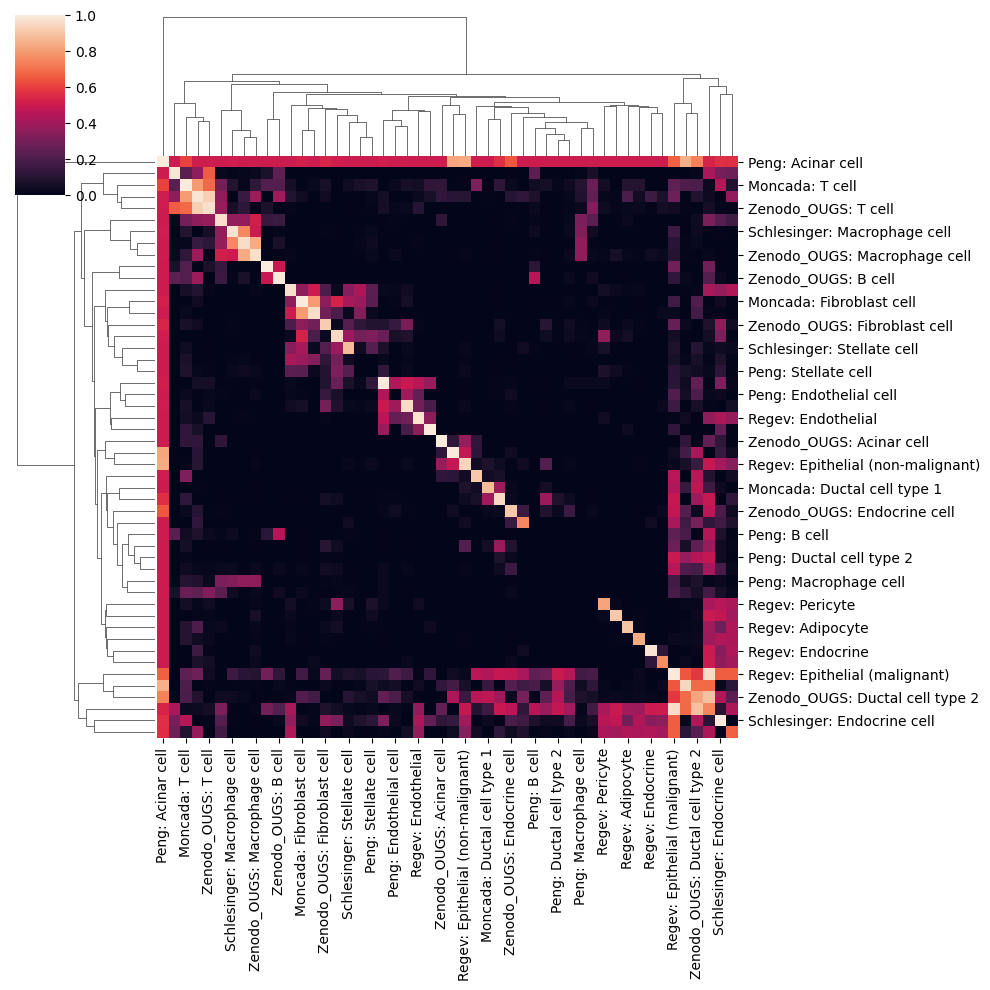

In [28]:
import seaborn as sns
sns.clustermap(member_mat)

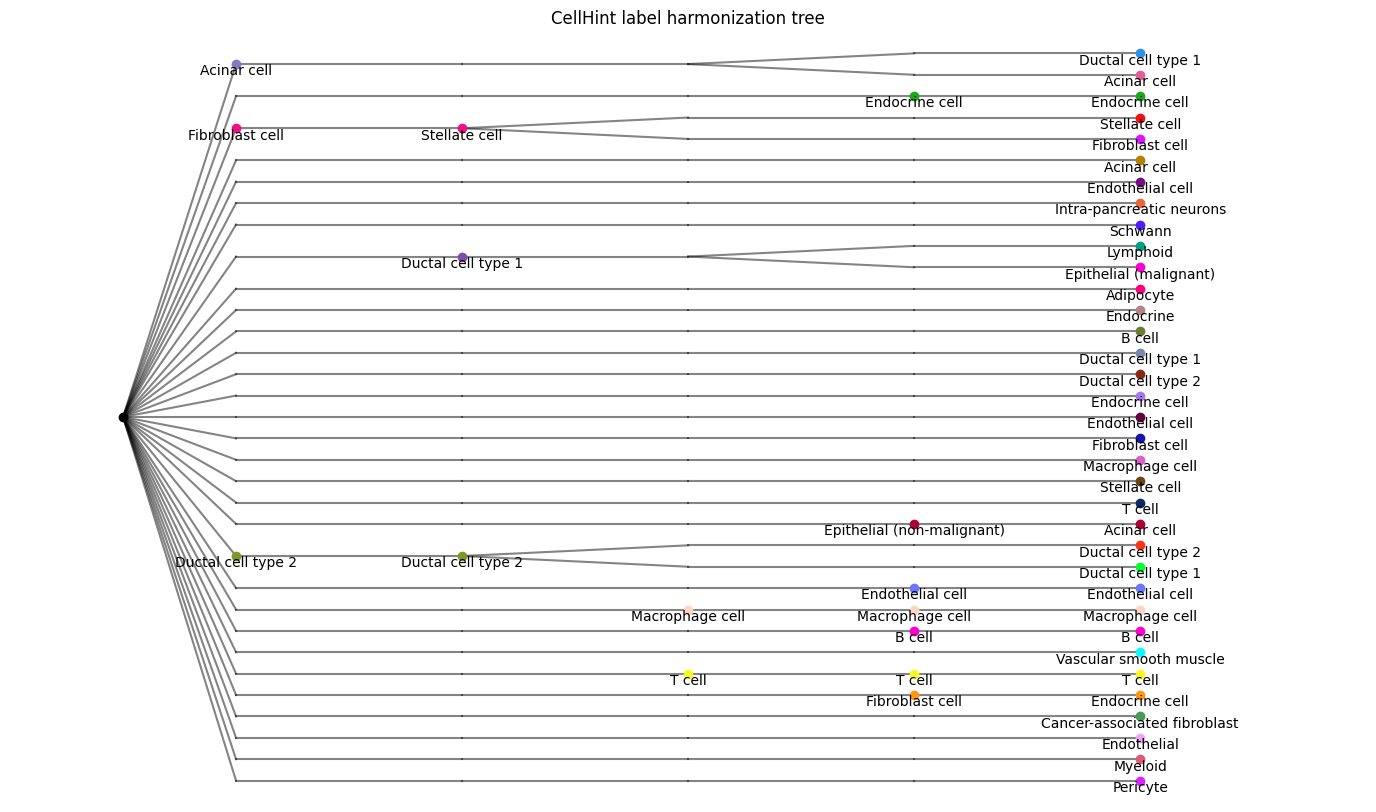

In [30]:
cellhint.treeplot(alignment, order_dataset = True)

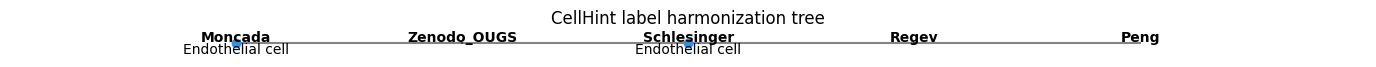

In [31]:
cellhint.treeplot(alignment.relation[alignment.groups == 'Group22'])

In [34]:
alignment.reannotation['cell_type']

ID
GSE111672_PDAC_A_Ductal...terminal.ductal.like.1             Ductal cell type 2
GSE111672_PDAC_A_Cancer.clone.A                              Ductal cell type 2
GSE111672_PDAC_A_Cancer.clone.A.1                            Ductal cell type 2
GSE111672_PDAC_A_Ductal...CRISP3.high.centroacinar.like.1    Ductal cell type 2
GSE111672_PDAC_A_Ductal...terminal.ductal.like.2             Ductal cell type 2
                                                                    ...        
pk210318_TTTGGTTTCCGATCTC-1                                     Macrophage cell
pk210318_TTTGGTTTCCTTCACG-1                                     Macrophage cell
pk210318_TTTGTTGCAATGCAAA-1                                              T cell
pk210318_TTTGTTGGTATGAGCG-1                                              T cell
pk210318_TTTGTTGTCCGTATGA-1                                              T cell
Name: cell_type, Length: 253805, dtype: object

In [38]:
adata.obs.Dataset.unique().tolist()

['Regev', 'Peng', 'Moncada', 'Schlesinger', 'Zenodo_OUGS']

## Cell hint does not seem to work, manual label harmonization to be done

In [ ]:
# adata.obs['L1_Annot_regev'] = adata.obs['L1_Annot_regev'].replace('nan', pd.NA)
# adata.obs['Annot_all'] = adata.obs['L1_Annot_regev'].fillna(adata.obs['Cell_type'])

In [57]:

# Given 'adata' is your AnnData object and you want to work with the following datasets:
datasets = ['Regev', 'Peng', 'Moncada', 'Schlesinger', 'Zenodo_OUGS']

# Create a dictionary to hold the cell types for each dataset
cell_types_dict = {dataset: sorted(adata[adata.obs.Dataset == dataset].obs['Annot_all'].dropna().unique()) for dataset in datasets}

# Find the longest list of cell types to standardize the length of all lists
max_length = max(len(lst) for lst in cell_types_dict.values())

# Standardize the length of all cell type lists
for dataset, cell_types in cell_types_dict.items():
    cell_types_dict[dataset] += [None] * (max_length - len(cell_types))  # Pad with None

# Create a DataFrame from the dictionary
df_cell_types = pd.DataFrame(cell_types_dict)

# This DataFrame has datasets as columns and alphabetized cell types as rows


In [58]:
(adata.obs.Annot_all.unique().tolist())

['Endothelial',
 'Epithelial (non-malignant)',
 'Epithelial (malignant)',
 'Cancer-associated fibroblast',
 'Endocrine',
 'Pericyte',
 'Lymphoid',
 'Schwann',
 'Myeloid',
 'Vascular smooth muscle',
 'Adipocyte',
 'Intra-pancreatic neurons',
 'Fibroblast cell',
 'Stellate cell',
 'Macrophage cell',
 'Endothelial cell',
 'T cell',
 'B cell',
 'Ductal cell type 2',
 'Endocrine cell',
 'Ductal cell type 1',
 'Acinar cell']

In [59]:
df_cell_types

,Regev,Peng,Moncada,Schlesinger,Zenodo_OUGS
0,Adipocyte,Acinar cell,Acinar cell,Acinar cell,Acinar cell
1,Cancer-associated fibroblast,B cell,Ductal cell type 1,B cell,B cell
2,Endocrine,Ductal cell type 1,Ductal cell type 2,Ductal cell type 1,Ductal cell type 1
3,Endothelial,Ductal cell type 2,Endocrine cell,Ductal cell type 2,Ductal cell type 2
4,Epithelial (malignant),Endocrine cell,Endothelial cell,Endocrine cell,Endocrine cell
5,Epithelial (non-malignant),Endothelial cell,Fibroblast cell,Endothelial cell,Endothelial cell
6,Intra-pancreatic neurons,Fibroblast cell,Macrophage cell,Fibroblast cell,Fibroblast cell
7,Lymphoid,Macrophage cell,T cell,Macrophage cell,Macrophage cell
8,Myeloid,Stellate cell,None,Stellate cell,Stellate cell
9,Pericyte,T cell,None,T cell,T cell


In [90]:
#create harmonization dictionary with GPT
harmonization = {'Acinar cell':'Acinar cell', 'Adipocyte': 'Adipocyte','Cancer-associated fibroblast': 'CAF','Ductal cell type 1': 'Ductal Cell','Ductal cell type 2': 'Ductal Cell',
    'Endocrine': 'Endocrine Cell','Endocrine cell': 'Endocrine Cell','Endothelial': 'Endothelial Cell','Endothelial cell': 'Endothelial Cell',
    'Epithelial (malignant)': 'Malignant Epithelial Cell','Epithelial (non-malignant)': 'Epithelial Cell','Fibroblast cell': 'Fibroblast',
    'Intra-pancreatic neurons': 'Intra-pancreatic Neurons','Lymphoid': 'Lymphoid Cell','Macrophage cell': 'Macrophage','Myeloid': 'Myeloid Cell','Pericyte': 'Pericyte',
    'Schwann': 'Schwann Cell','Stellate cell': 'Stellate Cell', 'B cell': 'B cell',
    'T cell': 'T Cell','Vascular smooth muscle': 'Smooth Muscle Cell', 'None': 'Uncharacterized'}

In [91]:
len(harmonization)

23

In [92]:
adata.obs['Label_Harmonized'] = adata.obs.Annot_all.map(harmonization).astype(str)

In [69]:
adata.obs

,Type,Cell_type,sampleid,ID,Dataset,L1_Annot_regev,L2_Annot_regev,L3_Annot_regev,Patient,Annot_all,Label_Harmonized
GCGTTTCAGCATTTGC-1-0,nan,nan,2507,T25,Regev,Endothelial,Vascular,Vascular,nan,Endothelial,Endothelial Cell
AACAACCAGCTCGCAC-1-0,nan,nan,2507,T25,Regev,Epithelial (non-malignant),Ductal (atypical),Ductal (atypical),nan,Epithelial (non-malignant),Epithelial Cell
ACTGTCCTCTTAAGGC-1-0,nan,nan,2507,T25,Regev,Endothelial,Vascular,Vascular,nan,Endothelial,Endothelial Cell
CTATCCGAGCCTATTG-1-0,nan,nan,2507,T25,Regev,Epithelial (malignant),Malignant,Malignant,nan,Epithelial (malignant),Malignant Epithelial Cell
GACCTTCTCCGCTGTT-1-0,nan,nan,2507,T25,Regev,Cancer-associated fibroblast,myCAF,myCAF,nan,Cancer-associated fibroblast,Fibroblast
...,...,...,...,...,...,...,...,...,...,...,...
pk210318_TTTGGTTTCCGATCTC-1,Tumor,Macrophage cell,nan,pk210318,Zenodo_OUGS,<NA>,nan,nan,pk210318,Macrophage cell,Macrophage
pk210318_TTTGGTTTCCTTCACG-1,Tumor,Macrophage cell,nan,pk210318,Zenodo_OUGS,<NA>,nan,nan,pk210318,Macrophage cell,Macrophage
pk210318_TTTGTTGCAATGCAAA-1,Tumor,T cell,nan,pk210318,Zenodo_OUGS,<NA>,nan,nan,pk210318,T cell,T Cell
pk210318_TTTGTTGGTATGAGCG-1,Tumor,T cell,nan,pk210318,Zenodo_OUGS,<NA>,nan,nan,pk210318,T cell,T Cell


In [87]:
mask = adata.obs['Annot_all'] != adata.obs['Label_Harmonized']

# Use this mask to filter the dataframe and see where the labels differ
mismatches = adata.obs[mask]

# To see the full output of mismatches, you can print it or view it in your environment
# Here's a small snippet of the dataframe showing the comparison
print(mismatches[['Annot_all', 'Label_Harmonized']].head())

                                         Annot_all           Label_Harmonized
GCGTTTCAGCATTTGC-1-0                   Endothelial           Endothelial Cell
AACAACCAGCTCGCAC-1-0    Epithelial (non-malignant)            Epithelial Cell
ACTGTCCTCTTAAGGC-1-0                   Endothelial           Endothelial Cell
CTATCCGAGCCTATTG-1-0        Epithelial (malignant)  Malignant Epithelial Cell
GACCTTCTCCGCTGTT-1-0  Cancer-associated fibroblast                 Fibroblast


In [93]:
mapping_counts = adata.obs.groupby(['Annot_all', 'Label_Harmonized']).size().reset_index(name='counts')
print(mapping_counts)

                       Annot_all           Label_Harmonized  counts
0                    Acinar cell                Acinar cell     531
1                      Adipocyte                  Adipocyte     430
2                         B cell                     B cell    4785
3   Cancer-associated fibroblast                        CAF   47663
4             Ductal cell type 1                Ductal Cell    3318
5             Ductal cell type 2                Ductal Cell   16883
6                      Endocrine             Endocrine Cell    8269
7                 Endocrine cell             Endocrine Cell     772
8                    Endothelial           Endothelial Cell   15818
9               Endothelial cell           Endothelial Cell    5361
10        Epithelial (malignant)  Malignant Epithelial Cell   53335
11    Epithelial (non-malignant)            Epithelial Cell   32097
12               Fibroblast cell                 Fibroblast    6527
13      Intra-pancreatic neurons   Intra-pancrea

In [94]:
adata[adata.obs.Annot_all.str.contains('inar')].obs.Annot_all.unique()

array(['Acinar cell'], dtype=object)

# harmonization dictionary lacks B cells, Acinar cells and lymphoid is problematic from regev

# retry cellhint wtih manually harmonized labels but still does not work

In [60]:
alignment_two = cellhint.harmonize(adata, dataset='Dataset', cell_type='Label_Harmonized', use_pct = True)

👀 Detected PCA coordinates in the object, will use these to calculate distances
🏋️ Training the predictive clustering trees for:
      Moncada
      Peng
      Regev
      Schlesinger
      Zenodo_OUGS
🖋️ Predicting distances using the PCT in each dataset
🏆 Reordering datasets
🖇 Harmonizing cell types of Moncada and Zenodo_OUGS
🖇 Harmonizing cell types of Schlesinger
🖇 Harmonizing cell types of Regev
🖇 Harmonizing cell types of Peng
🖋️ Reannotating cells
✅ Harmonization done!


In [62]:
alignment_two.relation

,Moncada,relation,Zenodo_OUGS,relation,Schlesinger,relation,Regev,relation,Peng
0,Endocrine Cell,=,Endocrine Cell,=,NONE,=,NONE,=,NONE
1,Fibroblast,=,Fibroblast,=,Fibroblast,=,NONE,=,NONE
2,NONE,=,Endothelial Cell,=,NONE,=,NONE,=,NONE
3,NONE,=,NONE,=,NONE,=,Intra-pancreatic Neurons,=,NONE
4,NONE,=,NONE,=,NONE,=,Schwann Cell,=,NONE
5,UNRESOLVED,=,UNRESOLVED,=,Endocrine Cell,=,Epithelial Cell,=,NONE
6,UNRESOLVED,=,UNRESOLVED,=,UNRESOLVED,=,Adipocyte,=,NONE
7,UNRESOLVED,=,UNRESOLVED,=,UNRESOLVED,=,Endocrine Cell,=,NONE
0,NONE,=,NONE,=,NONE,=,NONE,=,Endocrine Cell
1,NONE,=,NONE,=,NONE,=,NONE,=,Endothelial Cell


## cell hint does not work properly
## regev level 1 only has lymphoid, therefore I am transfering B and T cell labels from level 2
## Joining the different T cell subsets into one to maintain consistency across datasets

In [16]:
regev = adata[adata.obs.Dataset == 'Regev']

In [17]:
regev.obs[regev.obs['Annot_all'] == 'Lymphoid']['L2_Annot_regev'].unique().tolist()

['Plasma', 'CD8+ T', 'CD4+ T', 'Treg', 'Natural killer', 'B']

In [77]:
# Add labels from regev L2 for T and B cells

In [95]:
mask = adata.obs['Label_Harmonized'] == 'Lymphoid Cell'

adata.obs.loc[mask, 'Label_Harmonized'] = adata.obs.loc[mask, 'L2_Annot_regev']

In [96]:
adata[adata.obs.L1_Annot_regev == 'Lymphoid'].obs

,Type,Cell_type,sampleid,ID,Dataset,L1_Annot_regev,L2_Annot_regev,L3_Annot_regev,Patient,Annot_all,Label_Harmonized
AACAACCCAGCGTATT-1-0,nan,nan,2507,T25,Regev,Lymphoid,Plasma,Plasma,nan,Lymphoid,Plasma
CTCAGTCCACCTCTAC-1-0,nan,nan,2507,T25,Regev,Lymphoid,CD8+ T,CD8+ T,nan,Lymphoid,CD8+ T
TCCTCCCAGAGTGTGC-1-0,nan,nan,2507,T25,Regev,Lymphoid,CD8+ T,CD8+ T,nan,Lymphoid,CD8+ T
CGGCAGTAGCACAAAT-1-0,nan,nan,2507,T25,Regev,Lymphoid,CD4+ T,CD4+ T,nan,Lymphoid,CD4+ T
TCATCCGAGCTGTGCC-1-0,nan,nan,2507,T25,Regev,Lymphoid,CD8+ T,CD8+ T,nan,Lymphoid,CD8+ T
...,...,...,...,...,...,...,...,...,...,...,...
TGAATCGGTTGTTGCA-1-44,nan,nan,MGH2101,T8,Regev,Lymphoid,B,B,nan,Lymphoid,B
AAGATAGAGCATCCTA-1-44,nan,nan,MGH2101,T8,Regev,Lymphoid,CD4+ T,CD4+ T,nan,Lymphoid,CD4+ T
CTAGGTAAGCCGATTT-1-44,nan,nan,MGH2101,T8,Regev,Lymphoid,B,B,nan,Lymphoid,B
ATCCTATAGGGTTGCA-1-44,nan,nan,MGH2101,T8,Regev,Lymphoid,CD4+ T,CD4+ T,nan,Lymphoid,CD4+ T


In [97]:
adata[adata.obs.L1_Annot_regev == 'Lymphoid'].obs.Label_Harmonized.unique()

array(['Plasma', 'CD8+ T', 'CD4+ T', 'Treg', 'Natural killer', 'B'],
      dtype=object)

In [98]:
harmonization_lymphoid = {
    'CD8+ T': 'T cell',
    'CD4+ T': 'T cell',
    'Treg': 'T cell',
    'Plasma': 'B cell',
    'B cell': 'B cell',
    'Natural Killer': 'NK cell',
    'B': 'B cell'
}

In [99]:
adata.obs['Label_Harmonized'] = adata.obs['Label_Harmonized'].replace(harmonization_lymphoid)

In [100]:
adata[adata.obs.L1_Annot_regev == 'Lymphoid'].obs

,Type,Cell_type,sampleid,ID,Dataset,L1_Annot_regev,L2_Annot_regev,L3_Annot_regev,Patient,Annot_all,Label_Harmonized
AACAACCCAGCGTATT-1-0,nan,nan,2507,T25,Regev,Lymphoid,Plasma,Plasma,nan,Lymphoid,B cell
CTCAGTCCACCTCTAC-1-0,nan,nan,2507,T25,Regev,Lymphoid,CD8+ T,CD8+ T,nan,Lymphoid,T cell
TCCTCCCAGAGTGTGC-1-0,nan,nan,2507,T25,Regev,Lymphoid,CD8+ T,CD8+ T,nan,Lymphoid,T cell
CGGCAGTAGCACAAAT-1-0,nan,nan,2507,T25,Regev,Lymphoid,CD4+ T,CD4+ T,nan,Lymphoid,T cell
TCATCCGAGCTGTGCC-1-0,nan,nan,2507,T25,Regev,Lymphoid,CD8+ T,CD8+ T,nan,Lymphoid,T cell
...,...,...,...,...,...,...,...,...,...,...,...
TGAATCGGTTGTTGCA-1-44,nan,nan,MGH2101,T8,Regev,Lymphoid,B,B,nan,Lymphoid,B cell
AAGATAGAGCATCCTA-1-44,nan,nan,MGH2101,T8,Regev,Lymphoid,CD4+ T,CD4+ T,nan,Lymphoid,T cell
CTAGGTAAGCCGATTT-1-44,nan,nan,MGH2101,T8,Regev,Lymphoid,B,B,nan,Lymphoid,B cell
ATCCTATAGGGTTGCA-1-44,nan,nan,MGH2101,T8,Regev,Lymphoid,CD4+ T,CD4+ T,nan,Lymphoid,T cell


In [101]:
#create harmonization dictionary with GPT
harmonization = {'Acinar cell':'Acinar cell', 'Adipocyte': 'Adipocyte','Cancer-associated fibroblast': 'CAF','Ductal cell type 1': 'Ductal Cell','Ductal cell type 2': 'Ductal Cell',
    'Endocrine': 'Endocrine Cell','Endocrine cell': 'Endocrine Cell','Endothelial': 'Endothelial Cell','Endothelial cell': 'Endothelial Cell',
    'Epithelial (malignant)': 'Malignant Epithelial Cell','Epithelial (non-malignant)': 'Epithelial Cell','Fibroblast cell': 'Fibroblast',
    'Intra-pancreatic neurons': 'Intra-pancreatic Neurons','Lymphoid': 'Lymphoid Cell','Macrophage cell': 'Macrophage','Myeloid': 'Myeloid Cell','Pericyte': 'Pericyte',
    'Schwann': 'Schwann Cell','Stellate cell': 'Stellate Cell', 'B': 'B cell', 'B cell': 'B cell', 
    'T cell': 'T Cell','Vascular smooth muscle': 'Smooth Muscle Cell', 'None': 'Uncharacterized'}

In [102]:
adata.obs['Label_Harmonized'] = adata.obs['Label_Harmonized'].replace(harmonization)

In [103]:
adata.obs.groupby('Annot_all').size()

Annot_all
Acinar cell                       531
Adipocyte                         430
B cell                           4785
Cancer-associated fibroblast    47663
Ductal cell type 1               3318
Ductal cell type 2              16883
Endocrine                        8269
Endocrine cell                    772
Endothelial                     15818
Endothelial cell                 5361
Epithelial (malignant)          53335
Epithelial (non-malignant)      32097
Fibroblast cell                  6527
Intra-pancreatic neurons           21
Lymphoid                         7418
Macrophage cell                  6704
Myeloid                         10085
Pericyte                        10984
Schwann                          1617
Stellate cell                    5439
T cell                          11441
Vascular smooth muscle           4307
dtype: int64

In [104]:
mapping_counts = adata.obs.groupby(['Annot_all', 'Label_Harmonized']).size().reset_index(name='counts')
print(mapping_counts)

                       Annot_all           Label_Harmonized  counts
0                    Acinar cell                Acinar cell     531
1                      Adipocyte                  Adipocyte     430
2                         B cell                     B cell    4785
3   Cancer-associated fibroblast                        CAF   47663
4             Ductal cell type 1                Ductal Cell    3318
5             Ductal cell type 2                Ductal Cell   16883
6                      Endocrine             Endocrine Cell    8269
7                 Endocrine cell             Endocrine Cell     772
8                    Endothelial           Endothelial Cell   15818
9               Endothelial cell           Endothelial Cell    5361
10        Epithelial (malignant)  Malignant Epithelial Cell   53335
11    Epithelial (non-malignant)            Epithelial Cell   32097
12               Fibroblast cell                 Fibroblast    6527
13      Intra-pancreatic neurons   Intra-pancrea

In [54]:
adata[adata.obs.Label_Harmonized == 'nan'].obs.Annot_all.unique()

array(['B cell'], dtype=object)

In [105]:
adata.write('concatenated_datasets/regev_peng_zenodo_label_harmonized.h5ad')

... storing 'Type' as categorical
... storing 'Cell_type' as categorical
... storing 'sampleid' as categorical
... storing 'ID' as categorical
... storing 'Dataset' as categorical
... storing 'L1_Annot_regev' as categorical
... storing 'L2_Annot_regev' as categorical
... storing 'L3_Annot_regev' as categorical
... storing 'Patient' as categorical
... storing 'Annot_all' as categorical
... storing 'Label_Harmonized' as categorical


In [110]:
# test = sc.read_h5ad('concatenated_datasets/regev_peng_zenodo_label_harmonized.h5ad')

# del test

In [6]:
adata = sc.read_h5ad('/home/aih/shrey.parikh/PDAC/PDAC/scanvae/scanvae_dataset_full_latent.h5ad')

In [8]:
adata = adata[adata.obs.Dataset.isin(['Regev','Moncada', 'Peng', 'Schlesinger', 'Zenodo_OUGS'])]

In [12]:
adata.obs

,Label_Harmonized,Dataset,predictions,leiden
0,Endothelial Cell,Regev,Endothelial Cell,4
1,Epithelial Cell,Regev,Epithelial Cell,10
2,Endothelial Cell,Regev,Endothelial Cell,4
3,Malignant Epithelial Cell,Regev,Malignant Epithelial Cell,58
4,CAF,Regev,CAF,5
...,...,...,...,...
253800,Macrophage,Zenodo_OUGS,Myeloid Cell,36
253801,Macrophage,Zenodo_OUGS,Myeloid Cell,36
253802,T Cell,Zenodo_OUGS,T Cell,2
253803,T Cell,Zenodo_OUGS,T Cell,12


In [15]:
sc.pp.neighbors(adata, n_neighbors=10)
sc.tl.umap(adata)

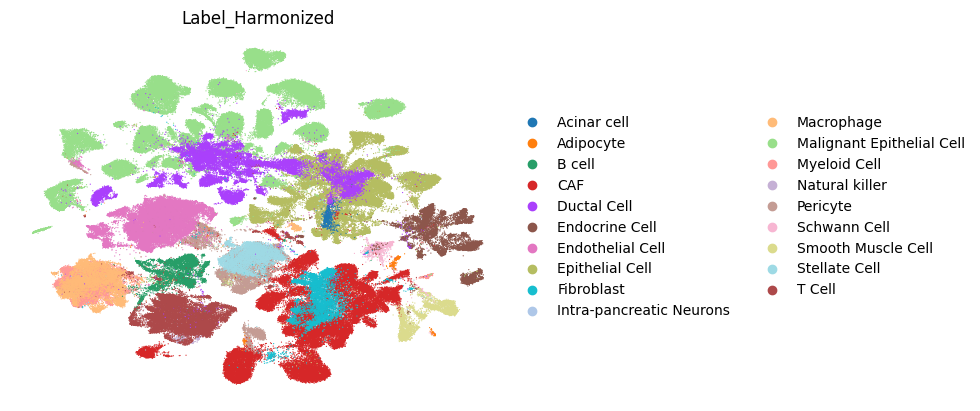

In [16]:
sc.pl.umap(adata, color='Label_Harmonized', frameon=False, size=3)

In [17]:
sc.pp.neighbors(adata, n_neighbors=20)
sc.tl.umap(adata)

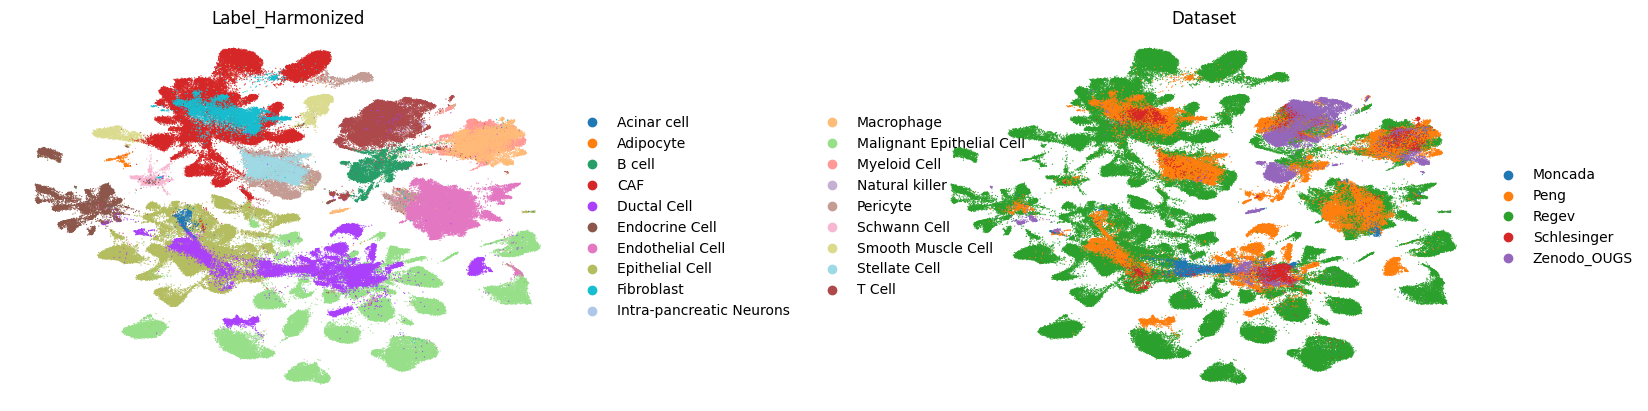

In [20]:
sc.pl.umap(adata, color=['Label_Harmonized', 'Dataset'], frameon=False, size=3, wspace=0.5)

In [21]:
df = pd.read_csv('/home/aih/shrey.parikh/PDAC/PDAC/scib_metrics_results_run2_subset.csv')

In [22]:

df

,Unnamed: 0,pcr_comparison,silhouette_batch,ilisi_graph,kBET,filename
0,0,0.845415,0.615620,0.097545,0.0,scVI_donor_reference_latent.h5ad
1,1,0.854257,0.587133,0.099720,0.0,scVI_dataset_reference_latent.h5ad
2,2,0.841368,0.598025,0.083436,0.0,scVI_dataset_reference_latent_8000.h5ad
3,3,0.683973,0.723693,0.148871,error,sysVI_dataset_reference_latent_8000.h5ad
4,4,0.584660,NaN,0.150329,0.0,sysVI_dataset_reference_latent.h5ad
5,5,0.705056,0.720007,0.176408,0.0,sysVI_donor_reference_latent.h5ad
6,6,0.610452,0.651356,0.106931,0.0,scPoli_donor_reference_latent.h5ad
7,7,0.593438,0.644585,0.099659,0.0,scPoli_dataset_reference_latent_8000.h5ad
8,8,0.610293,0.658731,0.105572,0.0,scPoli_dataset_reference_latent.h5ad
